In [337]:
#library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error,r2_score
import pickle

In [338]:
#memanggil dataset
df = pd.read_csv('PAANEN5.csv')
#deskripsi dataset
df.head()

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
0,2011/08/10,NaN,33,30,1950,182520
1,2011/08/11,NaN,33,29,952,89107
2,2011/08/14,NaN,33,30,1557,145735
3,2011/08/14,NaN,33,30,1225,114660
4,2011/08/14,NaN,33,30,978,915408


In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   masa_panen      702 non-null    object 
 1   arus            684 non-null    float64
 2   Salinitas       702 non-null    int64  
 3   suhu            702 non-null    int64  
 4   total_produksi  702 non-null    int64  
 5   modal           702 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 33.0+ KB


<Axes: >

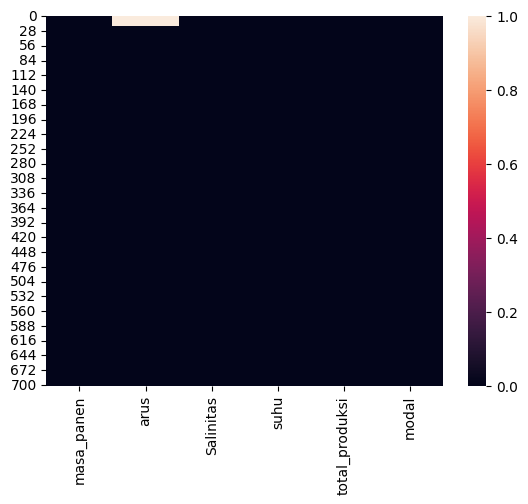

In [340]:
#melihat missing data
sns.heatmap(df.isnull())

In [341]:
#mengisi data yang kosong pada kolom arus
rata_arus = df['arus'].mean()

In [342]:
df['arus'] = df['arus'].fillna(rata_arus)
df['arus'].isna().sum()

0

In [343]:
df

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
0,2011/08/10,0.229444,33,30,1950,182520
1,2011/08/11,0.229444,33,29,952,89107
2,2011/08/14,0.229444,33,30,1557,145735
3,2011/08/14,0.229444,33,30,1225,114660
4,2011/08/14,0.229444,33,30,978,915408
...,...,...,...,...,...,...
697,2022/08/18,0.440000,33,30,3477,976342
698,2022/09/18,0.320000,33,29,2318,648725
699,2022/10/18,0.320000,33,29,2450,687960
700,2022/11/18,0.700000,33,29,2450,687960


In [344]:
df['masa_panen'] = pd.to_datetime(df['masa_panen'], format='%Y/%m/%d', errors='coerce')


In [345]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 702 entries, 0 to 701
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   masa_panen      701 non-null    datetime64[ns]
 1   arus            702 non-null    float64       
 2   Salinitas       702 non-null    int64         
 3   suhu            702 non-null    int64         
 4   total_produksi  702 non-null    int64         
 5   modal           702 non-null    int64         
dtypes: datetime64[ns](1), float64(1), int64(4)
memory usage: 33.0 KB


<Axes: >

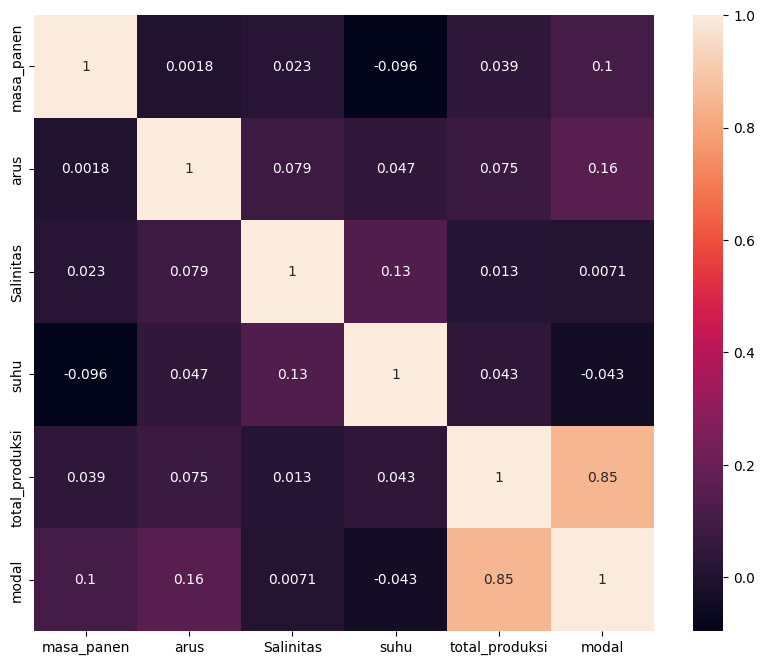

In [346]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)

In [347]:
# mencari korelasi 'spearman' untuk tiap pasang variabel
print (df.corr(method='spearman'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000  0.068464   0.095568 -0.311268        0.248181   
arus              0.068464  1.000000   0.152959  0.122450        0.131408   
Salinitas         0.095568  0.152959   1.000000  0.143509        0.022924   
suhu             -0.311268  0.122450   0.143509  1.000000        0.061384   
total_produksi    0.248181  0.131408   0.022924  0.061384        1.000000   
modal             0.409692  0.043013  -0.009643 -0.044903        0.910416   

                   modal  
masa_panen      0.409692  
arus            0.043013  
Salinitas      -0.009643  
suhu           -0.044903  
total_produksi  0.910416  
modal           1.000000  


In [348]:
# mencari korelasi 'kendall' untuk tiap pasang variabel
print (df.corr(method='kendall'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000  0.039940   0.078242 -0.229351        0.157396   
arus              0.039940  1.000000   0.126944  0.083524        0.087931   
Salinitas         0.078242  0.126944   1.000000  0.128102        0.018756   
suhu             -0.229351  0.083524   0.128102  1.000000        0.044633   
total_produksi    0.157396  0.087931   0.018756  0.044633        1.000000   
modal             0.276711  0.026747  -0.007883 -0.032625        0.766926   

                   modal  
masa_panen      0.276711  
arus            0.026747  
Salinitas      -0.007883  
suhu           -0.032625  
total_produksi  0.766926  
modal           1.000000  


In [349]:
df.describe()

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
count,701,702.000000,702.000000,702.000000,702.000000,7.020000e+02
mean,2015-07-02 01:11:53.837375232,0.229444,33.041311,29.418803,1146.246439,1.826269e+05
min,2011-02-21 00:00:00,0.000000,33.000000,26.000000,12.000000,1.947000e+03
25%,2013-12-16 00:00:00,0.130000,33.000000,28.000000,350.000000,3.879225e+04
50%,2014-10-10 00:00:00,0.200000,33.000000,30.000000,649.500000,7.005500e+04
75%,2016-12-20 00:00:00,0.290000,33.000000,30.000000,1200.000000,1.349242e+05
max,2022-12-18 00:00:00,0.800000,34.000000,33.000000,57200.000000,5.353920e+06
std,NaN,0.159170,0.199149,1.379942,2439.024068,3.310794e+05


c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and 

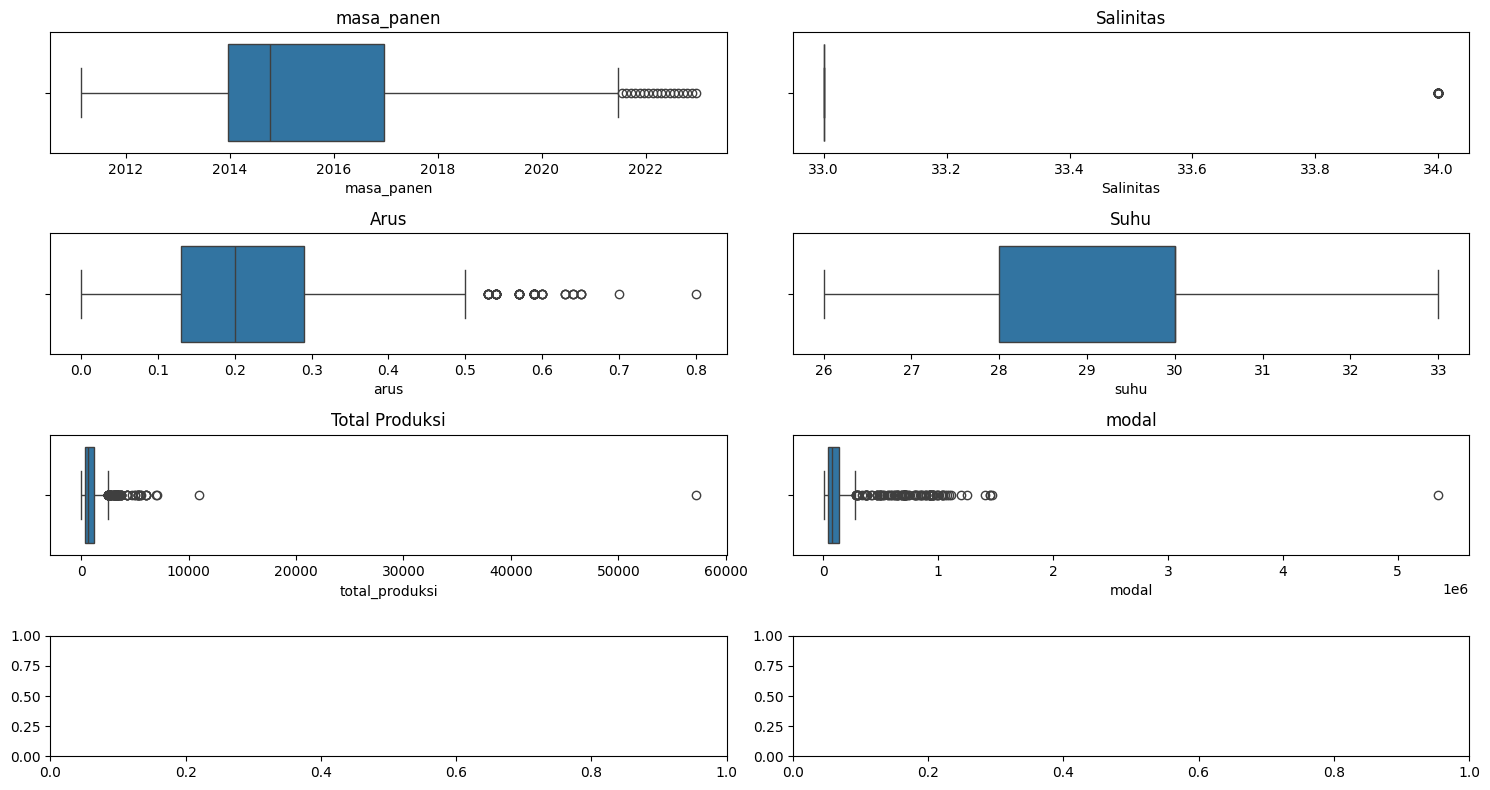

In [350]:
# Membuat plot dengan m baris, n kolom, dan p penempatan kanan (2) dan kiri (1)
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df.masa_panen, ax=axes[0, 0])
axes[0, 0].set_title('masa_panen')

sns.boxplot(x=df.Salinitas, ax=axes[0, 1])
axes[0, 1].set_title('Salinitas')

sns.boxplot(x=df.arus, ax=axes[1, 0])
axes[1, 0].set_title('Arus')

sns.boxplot(x=df.suhu, ax=axes[1, 1])
axes[1, 1].set_title('Suhu')

sns.boxplot(x=df.total_produksi, ax=axes[2, 0])
axes[2, 0].set_title('Total Produksi')

sns.boxplot(x=df.modal, ax=axes[2, 1])
axes[2, 1].set_title('modal')

plt.tight_layout()
plt.show()


In [351]:
def remove_outliers(df, columns):
    df2 = df.copy()
    for column in columns:
        Q1 = df2[column].quantile(0.25)
        Q3 = df2[column].quantile(0.75)
        IQR = Q3 - Q1

        # Filter data tanpa outlier
        df2 = df2[(df2[column] >= Q1 - 1.5 * IQR) & (df2[column] <= Q3 + 1.5 * IQR)]

    return df2

# List kolom yang ingin dihapus outlier-nya
kolom = ['masa_panen', 'Salinitas', 'arus', 'suhu', 'total_produksi', 'modal']

# Hapus outlier dari DataFrame
df2 = remove_outliers(df, kolom)

# Cetak DataFrame tanpa outlier
print(df2)

    masa_panen      arus  Salinitas  suhu  total_produksi   modal
0   2011-08-10  0.229444         33    30            1950  182520
1   2011-08-11  0.229444         33    29             952   89107
2   2011-08-14  0.229444         33    30            1557  145735
3   2011-08-14  0.229444         33    30            1225  114660
5   2011-08-17  0.229444         33    30            1175  109980
..         ...       ...        ...   ...             ...     ...
651 2020-03-11  0.070000         33    29             278   78062
655 2020-07-07  0.150000         33    28             723  193747
656 2020-07-14  0.150000         33    29              89   24991
657 2020-07-16  0.150000         33    29             555  155844
660 2020-07-24  0.150000         33    30             422  109729

[502 rows x 6 columns]


In [352]:
#melihat data yang kosong akibat penghapusan outlier
df2.isnull().any()

masa_panen        False
arus              False
Salinitas         False
suhu              False
total_produksi    False
modal             False
dtype: bool

c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and 

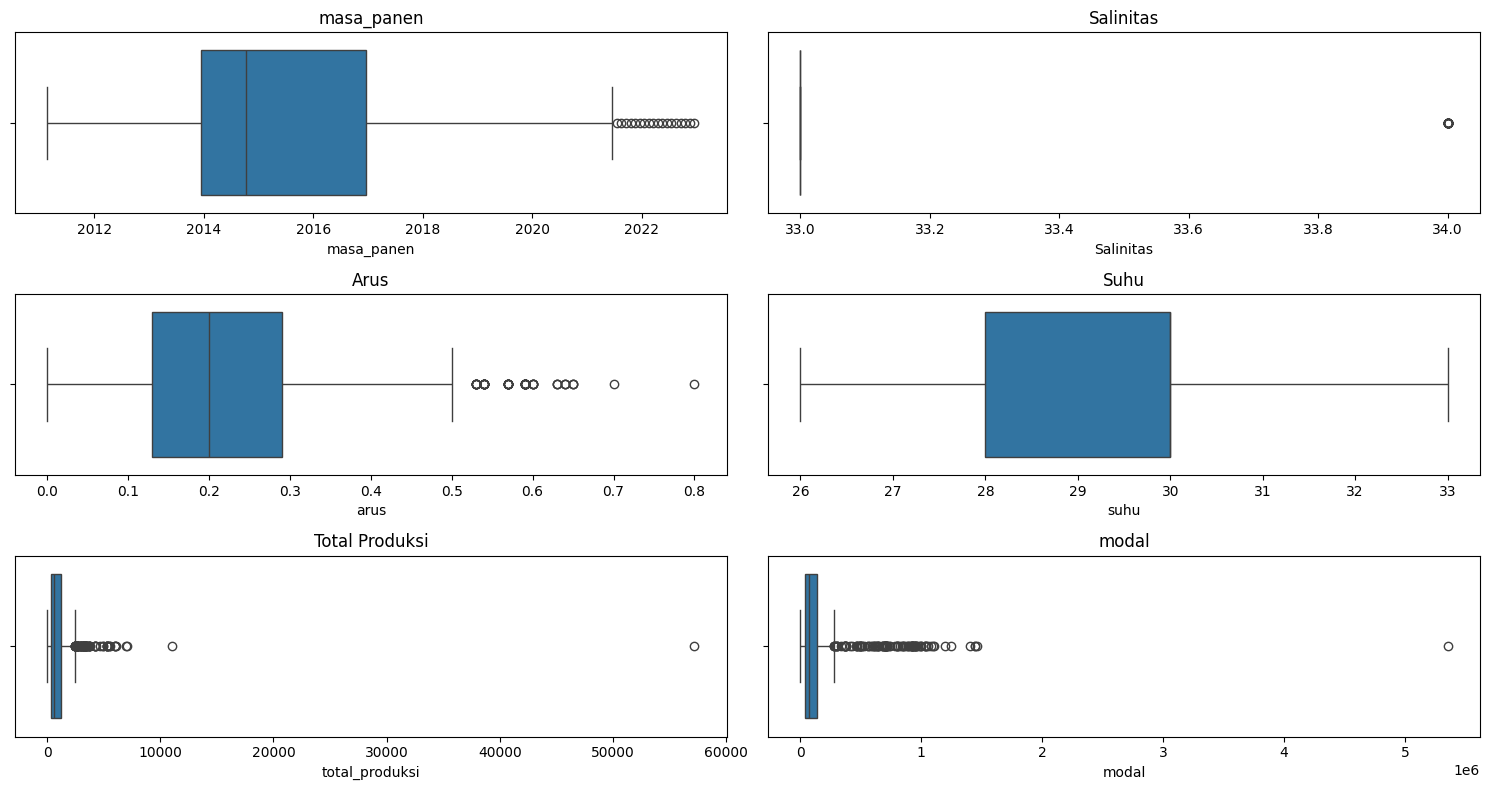

In [353]:
# Membuat plot dengan m baris, n kolom, dan p penempatan kanan (2) dan kiri (1)
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

sns.boxplot(x=df.masa_panen, ax=axes[0, 0])
axes[0, 0].set_title('masa_panen')

sns.boxplot(x=df.Salinitas, ax=axes[0, 1])
axes[0, 1].set_title('Salinitas')

sns.boxplot(x=df.arus, ax=axes[1, 0])
axes[1, 0].set_title('Arus')

sns.boxplot(x=df.suhu, ax=axes[1, 1])
axes[1, 1].set_title('Suhu')

sns.boxplot(x=df.total_produksi, ax=axes[2, 0])
axes[2, 0].set_title('Total Produksi')

sns.boxplot(x=df.modal, ax=axes[2, 1])
axes[2, 1].set_title('modal')

plt.tight_layout()
plt.show()


In [354]:
print ('before removing outliers :', len(df))
print ('after removing outliers :', len(df2))
print ('outliers :',len(df)-len(df2))

before removing outliers : 702
after removing outliers : 502
outliers : 200


In [355]:
#melihat kemiringan
print ('Kemiringan Data Arus', df2["arus"].skew())
print ('Kemiringan Data Salinitas', df2["Salinitas"].skew())
print ('Kemiringan Data Suhu', df2["suhu"].skew())
print ('Kemiringan Data Total Produksi', df2["total_produksi"].skew())
print ('Kemiringan Data Modal', df2["modal"].skew())

Kemiringan Data Arus 0.5418942341659205
Kemiringan Data Salinitas 0.0
Kemiringan Data Suhu 0.0068932901569271135
Kemiringan Data Total Produksi 0.9475694820470925
Kemiringan Data Modal 0.8472619243762346


In [356]:
#melihat kemiringan
print ('Kemiringan Data Arus', df2["arus"].kurtosis())
print ('Kemiringan Data Salinitas', df2["Salinitas"].kurtosis())
print ('Kemiringan Data Suhu', df2["suhu"].kurtosis())
print ('Kemiringan Data Total Produksi', df2["total_produksi"].kurtosis())
print ('Kemiringan Data Modal', df2["modal"].kurtosis())

Kemiringan Data Arus 0.09201436670802465
Kemiringan Data Salinitas 0.0
Kemiringan Data Suhu -0.46504659848473473
Kemiringan Data Total Produksi 0.615814105137336
Kemiringan Data Modal 0.1688937049136463


c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


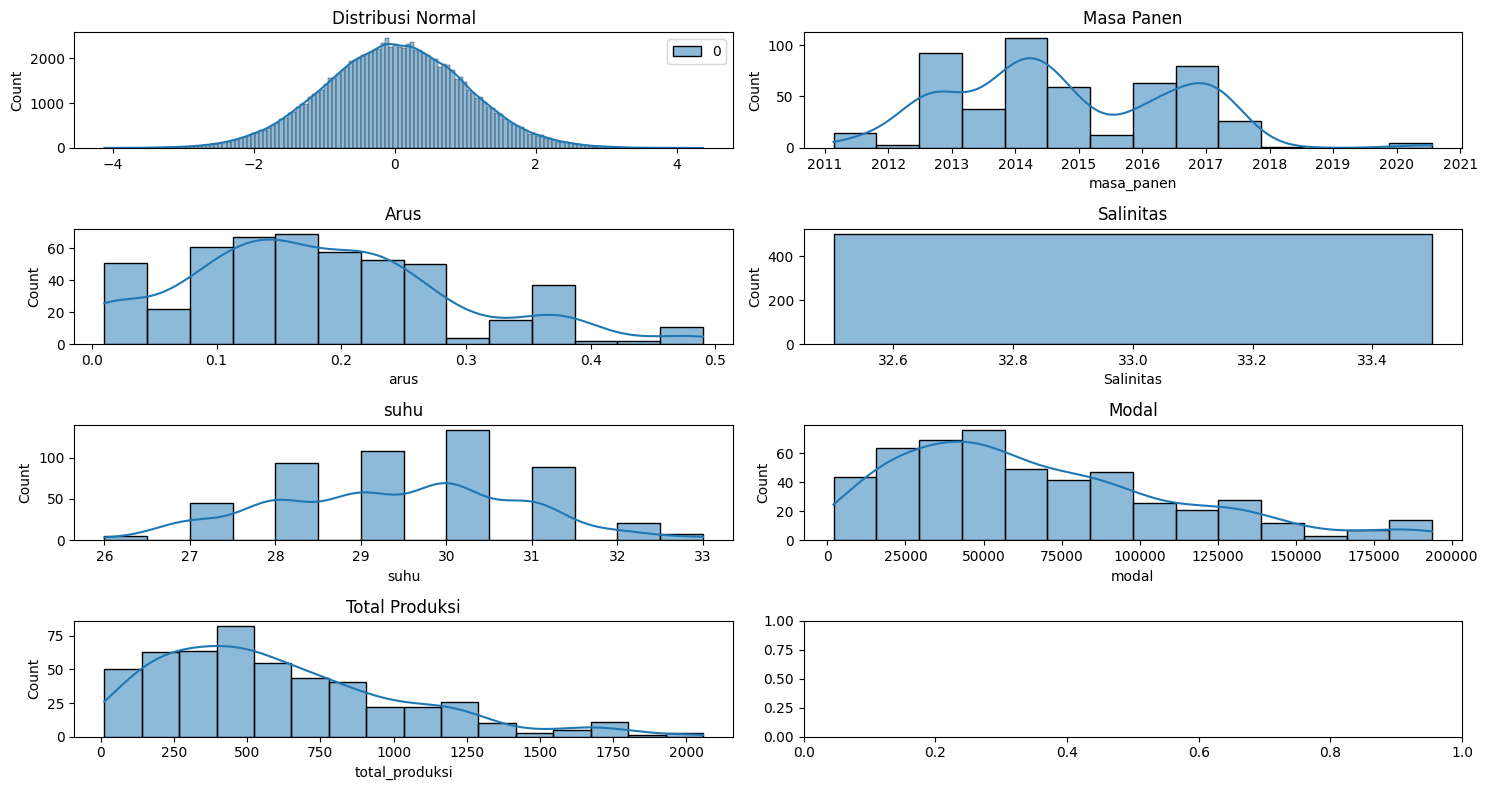

In [357]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

normal_rets = np.random.normal(0,1,(100000,1))
sns.histplot(normal_rets, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribusi Normal')

sns.histplot(df2.masa_panen, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Masa Panen')

sns.histplot(df2.arus, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Arus')

sns.histplot(df2.Salinitas, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Salinitas')

sns.histplot(df2.suhu, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('suhu')

sns.histplot(df2.modal, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Modal')

sns.histplot(df2.total_produksi, ax=axes[3, 0], kde=True)
axes[3, 0].set_title('Total Produksi')

plt.tight_layout()
plt.show()

In [358]:
# Mengaplikasikan cuberoot root transformation pada kolom tertentu : indikasi right skeness
columns_to_transform = ['suhu','arus','modal','total_produksi']
df2[columns_to_transform]= np.cbrt(df2[columns_to_transform])


c:\Users\Nabila Tufailah\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


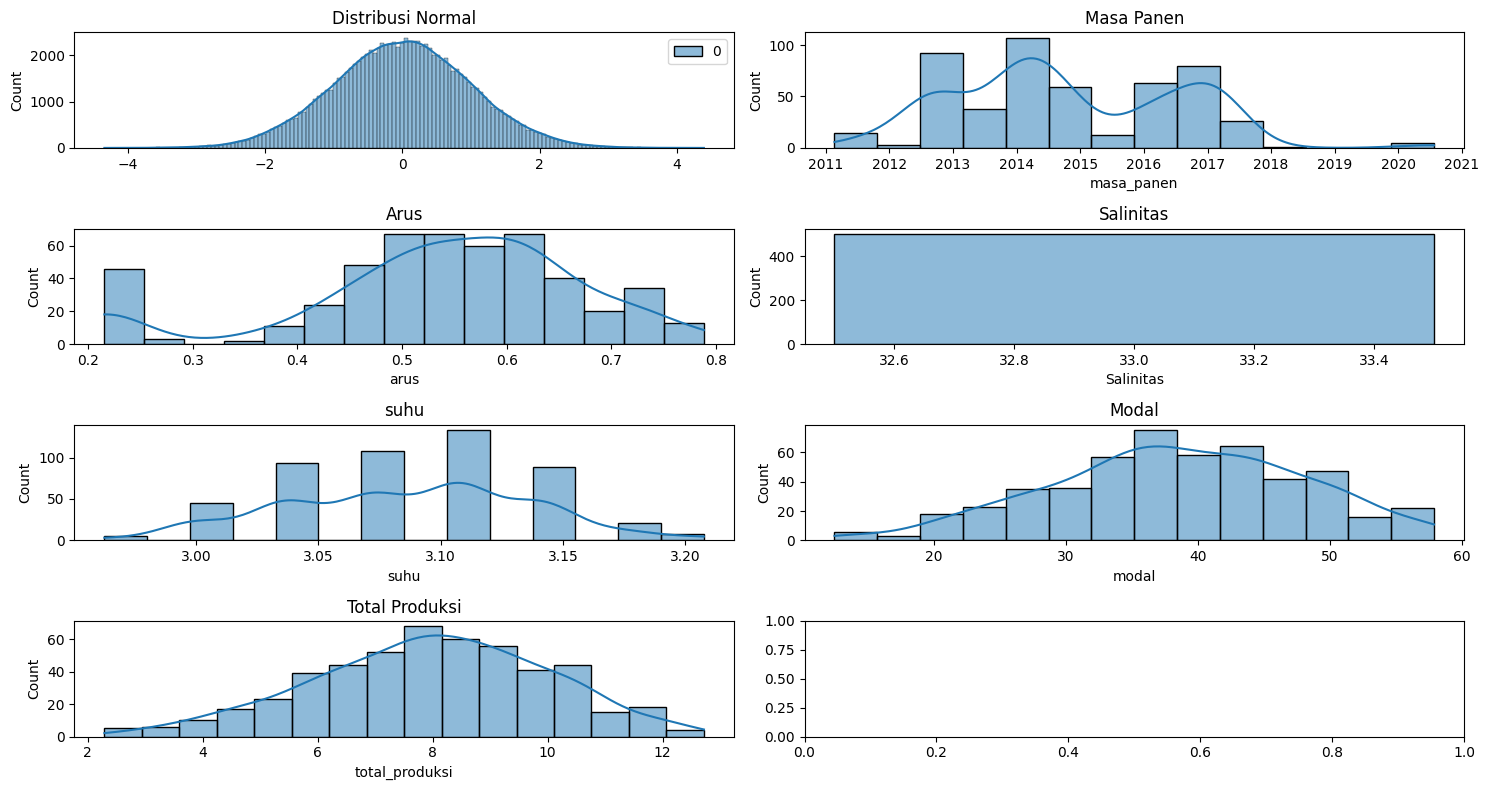

In [359]:
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 8), gridspec_kw={'width_ratios': [1, 1]})

normal_rets = np.random.normal(0,1,(100000,1))
sns.histplot(normal_rets, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Distribusi Normal')

sns.histplot(df2.masa_panen, ax=axes[0, 1], kde=True)
axes[0, 1].set_title('Masa Panen')

sns.histplot(df2.arus, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Arus')

sns.histplot(df2.Salinitas, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Salinitas')

sns.histplot(df2.suhu, ax=axes[2, 0], kde=True)
axes[2, 0].set_title('suhu')

sns.histplot(df2.modal, ax=axes[2, 1], kde=True)
axes[2, 1].set_title('Modal')

sns.histplot(df2.total_produksi, ax=axes[3, 0], kde=True)
axes[3, 0].set_title('Total Produksi')

plt.tight_layout()
plt.show()

<Axes: >

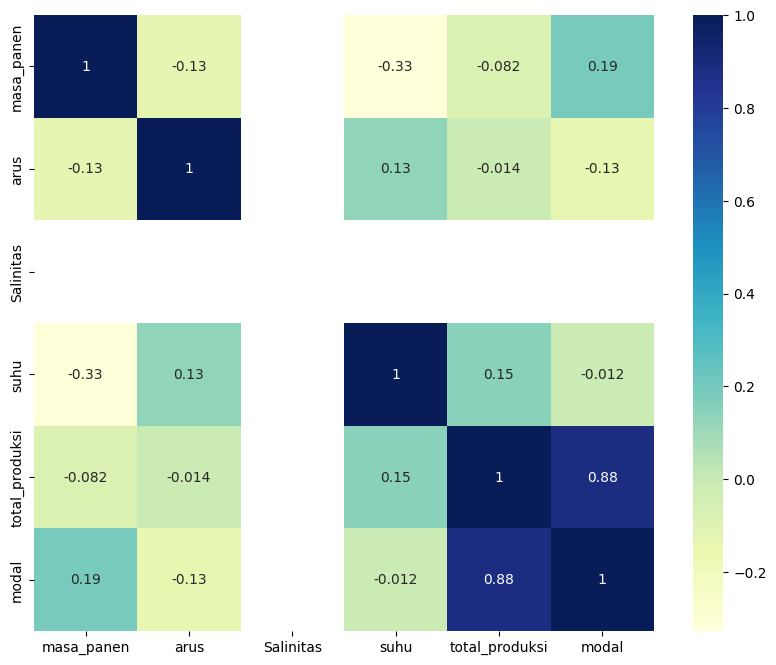

In [360]:
plt.figure(figsize=(10,8))
sns.heatmap(df2.corr(),cmap="YlGnBu", annot=True)

In [361]:
# menghitung korelasi dari setiap pasang variabel pada raw_data
print (df2.corr())

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000 -0.127400        NaN -0.327115       -0.082427   
arus             -0.127400  1.000000        NaN  0.129466       -0.013950   
Salinitas              NaN       NaN        NaN       NaN             NaN   
suhu             -0.327115  0.129466        NaN  1.000000        0.149662   
total_produksi   -0.082427 -0.013950        NaN  0.149662        1.000000   
modal             0.189149 -0.133976        NaN -0.012337        0.881786   

                   modal  
masa_panen      0.189149  
arus           -0.133976  
Salinitas            NaN  
suhu           -0.012337  
total_produksi  0.881786  
modal           1.000000  


In [362]:
# mencari korelasi 'kendall' untuk tiap pasang variabel
print (df2.corr(method='kendall'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000 -0.117049        NaN -0.224284       -0.056058   
arus             -0.117049  1.000000        NaN  0.148670        0.027617   
Salinitas              NaN       NaN        1.0       NaN             NaN   
suhu             -0.224284  0.148670        NaN  1.000000        0.096286   
total_produksi   -0.056058  0.027617        NaN  0.096286        1.000000   
modal             0.119526 -0.057160        NaN -0.029832        0.711734   

                   modal  
masa_panen      0.119526  
arus           -0.057160  
Salinitas            NaN  
suhu           -0.029832  
total_produksi  0.711734  
modal           1.000000  


In [363]:
# mencari korelasi 'spearman' untuk tiap pasang variabel
print (df2.corr(method='spearman'))

                masa_panen      arus  Salinitas      suhu  total_produksi  \
masa_panen        1.000000 -0.160518        NaN -0.316398       -0.078422   
arus             -0.160518  1.000000        NaN  0.215956        0.040659   
Salinitas              NaN       NaN        NaN       NaN             NaN   
suhu             -0.316398  0.215956        NaN  1.000000        0.132884   
total_produksi   -0.078422  0.040659        NaN  0.132884        1.000000   
modal             0.191545 -0.088186        NaN -0.041274        0.874461   

                   modal  
masa_panen      0.191545  
arus           -0.088186  
Salinitas            NaN  
suhu           -0.041274  
total_produksi  0.874461  
modal           1.000000  


In [364]:
df2.shape

(502, 6)

In [365]:
# Convert 'masa_panen' to period (day)
df2['masa_panen'] = df2['masa_panen'].dt.to_period("D")

# Group by 'masa_panen' and sum the number of items
tanggal_masapanen = df2.groupby('masa_panen').sum().reset_index()

tanggal_masapanen['masa_panen'] = tanggal_masapanen['masa_panen'].dt.to_timestamp()

In [366]:
tanggal_masapanen.head(10)

,masa_panen,arus,Salinitas,suhu,total_produksi,modal
0,2011-02-21,1.224398,66,6.282761,18.967209,79.945131
1,2011-08-10,0.612199,33,3.107233,12.493330,56.724432
2,2011-08-11,0.612199,33,3.072317,9.837369,44.665336
3,2011-08-14,1.224398,66,6.214465,22.290216,101.205966
4,2011-08-17,1.836597,99,9.321698,25.167669,114.270646
5,2011-08-18,0.612199,33,3.072317,9.854562,44.743396
6,2011-10-04,0.612199,33,3.141381,10.997244,46.352366
7,2011-10-08,1.224398,66,6.073178,15.317021,64.559985
8,2011-10-09,0.612199,33,3.107233,9.854562,41.536089
9,2011-10-10,0.612199,33,3.107233,9.133803,38.498285


In [367]:
tanggal_masapanen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231 entries, 0 to 230
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   masa_panen      231 non-null    datetime64[ns]
 1   arus            231 non-null    float64       
 2   Salinitas       231 non-null    int64         
 3   suhu            231 non-null    float64       
 4   total_produksi  231 non-null    float64       
 5   modal           231 non-null    float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 11.0 KB


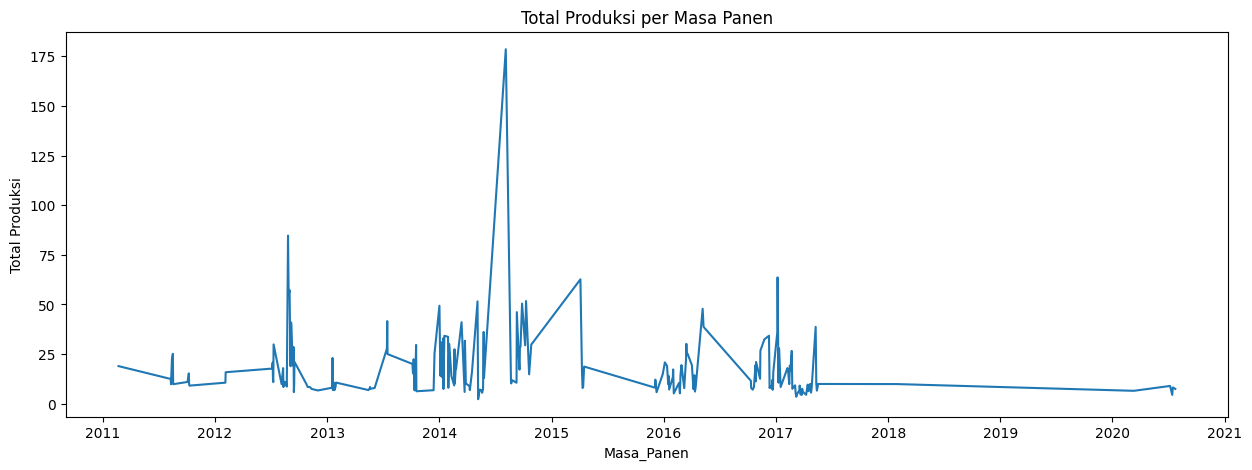

In [370]:
#visualization
plt.figure(figsize=(15,5))
plt.plot(tanggal_masapanen['masa_panen'], tanggal_masapanen['total_produksi'])
plt.xlabel("Masa_Panen")
plt.ylabel("Total Produksi")
plt.title("Total Produksi per Masa Panen")
plt.show()

In [374]:
tanggal_masapanen['masa_panen'] = tanggal_masapanen['masa_panen'].astype('int64')

In [375]:
#pembagian data
X = tanggal_masapanen.iloc[:,0:-1].values
y = tanggal_masapanen.iloc[:,5].values

In [376]:
X_train, X_test, y_train, y_test = train_test_split (X,y,test_size=0.25,random_state=42)
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1,1)
print ("Train Data Shape: ", X_train.shape, y_train.shape)
print ("Test Data Shape: ", X_test.shape, y_test.shape)

Train Data Shape:  (173, 5) (173, 1)
Test Data Shape:  (58, 5) (58, 1)


In [377]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test) 

In [380]:
from sklearn.decomposition import PCA
pca = PCA(5)
pca.fit(X_train_scaled)

PCA(n_components=5)

In [382]:
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained Variance Ratio for each Principal Component:")
for i, ratio in enumerate(explained_variance_ratio):
    print(f"  Principal Component {i+1}: {ratio}")

Explained Variance Ratio for each Principal Component:
  Principal Component 1: 0.7812439843635361
  Principal Component 2: 0.19014481783956988
  Principal Component 3: 0.019127244432414862
  Principal Component 4: 0.009397528375563029
  Principal Component 5: 8.642498891599374e-05


In [383]:
X_train_scaled = pca.transform(X_train_scaled)
X_test_scaled = pca.transform(X_test_scaled)

In [386]:
#GridsearchCV
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
models = {}

for kernel in kernels:
    svr_model = SVR(kernel=kernel)

    param_grid = {}
    if kernel == 'linear':
        param_grid = {"C": [0.1, 1, 10]}
    elif kernel == 'poly':
        param_grid = {"C": [0.1, 1, 10], "degree": [2, 3, 4], "coef0": [0.0, 0.1, 0.5], "gamma": [0.01, 0.1, 1]}
    elif kernel == 'rbf':
        param_grid = {"C": [0.1, 1, 10], "gamma": [0.01, 0.1], "epsilon": [1, 0.1, 0.01]}
    elif kernel == 'sigmoid':
        param_grid = {"C": [0.1, 1, 10], "coef0": [0.0, 0.1, 0.5], "gamma": [0.01, 0.1, 1]}

    grid_search = GridSearchCV(svr_model, param_grid, cv=5, n_jobs=-1, verbose=1, scoring='neg_mean_squared_error')
    grid_search.fit(X_train_scaled, y_train.ravel())

    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test_scaled)

    mse = mean_squared_error(y_test.ravel(), y_pred.ravel())
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test.ravel() - y_pred) / y_test.ravel())) * 100
    r2 = r2_score(y_test.ravel(), y_pred.ravel())
    models[kernel] = best_model

    print(f"Kernel: {kernel}")
    print(f"Best Parameters: {grid_search.best_params_}")
    print(f"RMSE: {rmse}")
    print(f'MAPE: {mape:.2f}%')
    print(f"R2 Score: {r2}")
    print("-------------")


Fitting 5 folds for each of 3 candidates, totalling 15 fits
Kernel: linear
Best Parameters: {'C': 10}
RMSE: 11.019315748983972
MAPE: 6.89%
R2 Score: 0.9922598792948037
-------------
Fitting 5 folds for each of 81 candidates, totalling 405 fits
Kernel: poly
Best Parameters: {'C': 10, 'coef0': 0.5, 'degree': 2, 'gamma': 1}
RMSE: 18.050908721089048
MAPE: 7.41%
R2 Score: 0.979229994167519
-------------
Fitting 5 folds for each of 18 candidates, totalling 90 fits
Kernel: rbf
Best Parameters: {'C': 10, 'epsilon': 1, 'gamma': 0.01}
RMSE: 101.9598600298506
MAPE: 18.95%
R2 Score: 0.3373305652123533
-------------
Fitting 5 folds for each of 27 candidates, totalling 135 fits
Kernel: sigmoid
Best Parameters: {'C': 10, 'coef0': 0.0, 'gamma': 0.01}
RMSE: 73.11517047575035
MAPE: 22.26%
R2 Score: 0.6592361846490594
-------------


In [410]:
# Memilih kernel terbaik
selected_kernel = 'linear'
best_model_file = f"kernel_mantap_{selected_kernel}.pkl"

In [411]:
# Membuka model terbaik dari file menggunakan pickle
with open(best_model_file, 'wb') as f:
    pickle.dump(models[selected_kernel], f)

In [412]:
# Membuka kembali model terbaik dari file pickle
with open(best_model_file, 'rb') as f:
    loaded_model = pickle.load(f)

In [413]:
# Cek apakah model telah dimuat dengan benar
print("Model yang dimuat:", loaded_model)

Model yang dimuat: SVR(C=10, kernel='linear')


In [414]:
# Melakukan prediksi dengan data uji menggunakan model dari pickle
y_pred_test_pickle = loaded_model.predict(X_test_scaled)

In [419]:
# Melakukan prediksi baru menggunakan model dari pickle
prediksi = loaded_model.predict([[20251012, 0.40, 33,27,10000000]])
print("Prediksi Baru:", prediksi)

Prediksi Baru: [6.80788925e+08]


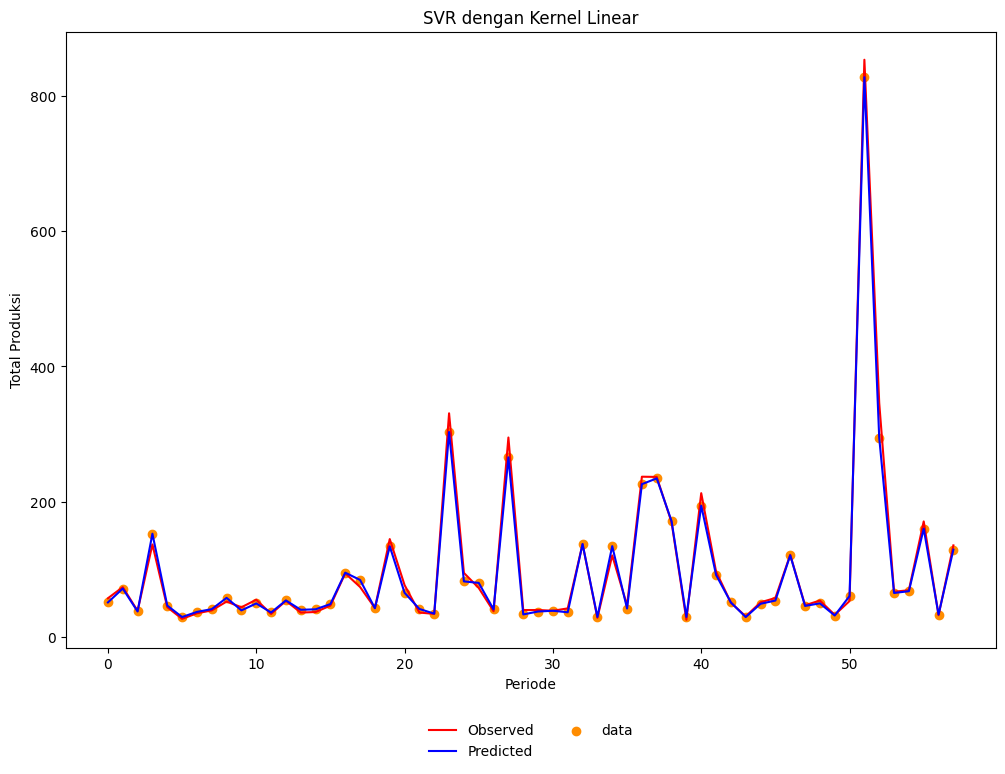

In [420]:
plt.rcParams['figure.figsize'] = (12,8)
x_ax = range(len(X_test_scaled))
plt.plot(x_ax, y_test, label = 'Observed', color = 'r', linestyle = '-')
plt.plot(x_ax, y_pred_test_pickle, label = 'Predicted', color = 'b', linestyle = '-')
plt.scatter(x_ax, y_pred_test_pickle, color='darkorange', label='data')
plt.ylabel('Total Produksi')
plt.xlabel('Periode')
plt.title('SVR dengan Kernel Linear')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.show()

In [421]:
print(f'pandas version: {pd.__version__}')
print(f'numpy version: {np.__version__}')
print(f'matplotlib version: {plt.matplotlib.__version__}')
print(f'seaborn version: {sns.__version__}')
print(f'Scikit-learn version: {sklearn.__version__}')

pandas version: 2.2.1
numpy version: 1.26.1
matplotlib version: 3.8.0
seaborn version: 0.13.0
Scikit-learn version: 1.3.2
